BIKE SHARE

In this notebook, I try to combine historical usage patterns with season data in order to forecast bike rental demand in the Bikeshare program in Washington D.C and the data here downloaded from kaggle.

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [14]:
bikes=pd.read_csv("C:/Users/NAZNEEN/Downloads/bikeshare.csv", index_col='datetime', parse_dates=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1


In [15]:
# "count" is a function, so to avoid  confusion we change the column name to total
bikes.rename(columns={'count':'total'}, inplace=True)

In [16]:
bikes_data=bikes.copy()

In [17]:
print(bikes_data.shape)

(10886, 11)


In [18]:
bikes_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
count,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00
mean,2.51,0.03,0.68,1.42,20.23,23.66,61.89,12.80,36.02,155.55,191.57
std,1.12,0.17,0.47,0.63,7.79,8.47,19.25,8.16,49.96,151.04,181.14
min,1.00,0.00,0.00,1.00,0.82,0.76,0.00,0.00,0.00,0.00,1.00
25%,2.00,0.00,0.00,1.00,13.94,16.66,47.00,7.00,4.00,36.00,42.00
50%,3.00,0.00,1.00,1.00,20.50,24.24,62.00,13.00,17.00,118.00,145.00
75%,4.00,0.00,1.00,2.00,26.24,31.06,77.00,17.00,49.00,222.00,284.00
max,4.00,1.00,1.00,4.00,41.00,45.45,100.00,57.00,367.00,886.00,977.00



The number of bikes rented on a average is 191.5 bikes.But due to large variation in min and max values of bikes rental lead to a high standard deviation. 

In [19]:
# To check Multicollinearity 

bikes_data.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.00,0.03,-0.01,0.01,0.26,0.26,0.19,-0.15,0.10,0.16,0.16
holiday,0.03,1.00,-0.25,-0.01,0.00,-0.01,0.00,0.01,0.04,-0.02,-0.01
workingday,-0.01,-0.25,1.00,0.03,0.03,0.02,-0.01,0.01,-0.32,0.12,0.01
weather,0.01,-0.01,0.03,1.00,-0.06,-0.06,0.41,0.01,-0.14,-0.11,-0.13
temp,0.26,0.00,0.03,-0.06,1.00,0.98,-0.06,-0.02,0.47,0.32,0.39
atemp,0.26,-0.01,0.02,-0.06,0.98,1.00,-0.04,-0.06,0.46,0.31,0.39
humidity,0.19,0.00,-0.01,0.41,-0.06,-0.04,1.00,-0.32,-0.35,-0.27,-0.32
windspeed,-0.15,0.01,0.01,0.01,-0.02,-0.06,-0.32,1.00,0.09,0.09,0.10
casual,0.10,0.04,-0.32,-0.14,0.47,0.46,-0.35,0.09,1.00,0.50,0.69
registered,0.16,-0.02,0.12,-0.11,0.32,0.31,-0.27,0.09,0.50,1.00,0.97



temp and atemp are highly correlated, So having both of them in regression model lead to multicollinearity issue. Therefore, we will drop one of the variable.

Categorical variables (season, holiday, workingday, weather) need chi square test, so we will not describe them and read only numerical values. 

Whereas, total is nothing but the combination of  casual & registered. So, we can ignore casual & registered because our dependent variable or output is 'total'. 




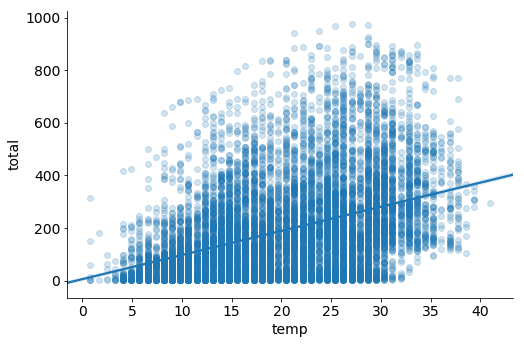

In [20]:
# scatter plot
a=sns.lmplot(x='temp', y='total', fit_reg=True, data=bikes_data, aspect=1.5, scatter_kws={'alpha':0.2})


From the graph, we can see that the number of rental bikes increases as the temp increases. From the correlation matrix, it is observed that temp and total having the positive correlation.

In [21]:
# exploring more features
feature_cols = ['temp', 'season', 'weather', 'humidity']

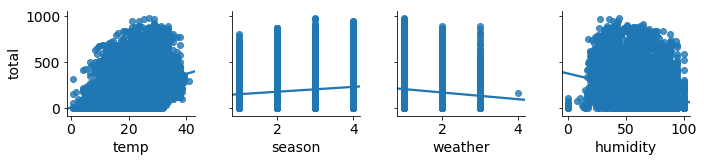

In [22]:
# multiple scatter plots in Seaborn
sns.pairplot(bikes_data, x_vars=feature_cols, y_vars='total', kind='reg')

It is noticed from the graph that season is showing some unsual trend. The number of bikes rental are high during winter than spring, which is unusual to accept that to in washington where we have adverse weather in winter (heavy snow). So go further with boxplot to dig more insight into it.

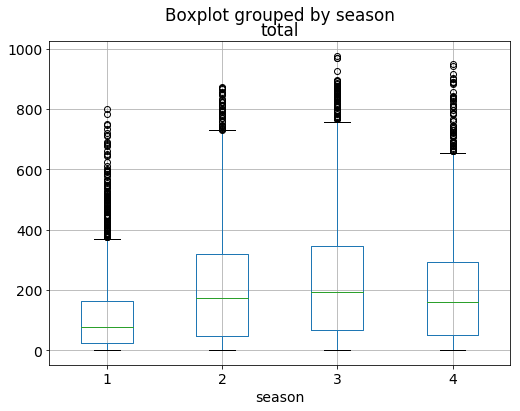

In [23]:
# box plot of rentals, grouped by season
bikes.boxplot(column='total', by='season')

The max bikes rental are during season 2  & 3 (summer & fall) but having winter more bike rental than spring is strange. The reason for such ambiguity is transition period of season is not defined in the dataset. When winter or season is starting and ending. Therefore, the values which need to be calculated in spring ends up in winter. Hence, potrays there are more rentals in the winter than the spring, but only because the system is experiencing overall growth and the winter months happen to come before the spring months.

**Handling categorical features**

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

Ordered categories: transform them to sensible numeric values (example: small=1, medium=2, large=3)

Unordered categories: use dummy encoding (0/1)

What are the categorical features in our dataset?

Ordered categories: weather (already encoded with sensible numeric values)

Unordered categories: season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an ordered relationship. Instead, we create multiple dummy variables:

In [24]:
# create dummy variables
season_dummies = pd.get_dummies(bikes_data.season, prefix='season')

# print 5 random rows
season_dummies.sample(n=5, random_state=12)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-06-11 18:00:00,0,1,0,0
2012-06-01 14:00:00,0,1,0,0
2012-07-19 09:00:00,0,0,1,0
2011-01-08 04:00:00,1,0,0,0
2012-03-08 10:00:00,1,0,0,0


However, we actually only need **three dummy variables (not four)**, and thus we'll drop the first dummy variable.

Why? Because three dummies captures all of the "information" about the season feature, and implicitly defines spring (season 1) as the **baseline level:**

In [25]:
# drop the first column
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

# print 5 random rows
season_dummies.sample(n=5, random_state=12)

,season_2,season_3,season_4
datetime,,,
2011-06-11 18:00:00,1,0,0
2012-06-01 14:00:00,1,0,0
2012-07-19 09:00:00,0,1,0
2011-01-08 04:00:00,0,0,0
2012-03-08 10:00:00,0,0,0


In [26]:
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
bikes_data = pd.concat([bikes_data, season_dummies], axis=1)

# print 5 random rows
bikes_data.sample(n=5, random_state=12)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-06-11 18:00:00,2,0,0,2,29.52,34.09,62,9.00,131,155,286,1,0,0
2012-06-01 14:00:00,2,0,1,3,29.52,34.09,66,19.00,55,199,254,1,0,0
2012-07-19 09:00:00,3,0,1,2,31.16,35.60,58,19.00,36,282,318,0,1,0
2011-01-08 04:00:00,1,0,0,3,7.38,9.85,55,11.00,0,1,1,0,0,0
2012-03-08 10:00:00,1,0,1,1,20.50,24.24,68,31.00,19,119,138,0,0,0


In [27]:
# include dummy variables for season in the model
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes_data[feature_cols]  # input or independent variable 
y = bikes_data.total          # Output or Dependent variable
linreg = LinearRegression()
linreg.fit(X, y)
list(zip(feature_cols, linreg.coef_))

[('temp', 11.186405863575784),
 ('season_2', -3.3905430997179598),
 ('season_3', -41.73686071317068),
 ('season_4', 64.41596146824214),
 ('humidity', -2.819481636259646)]


To interpret the season coefficients? It is measured against the baseline (spring):

Holding all other features fixed, summer is associated with a rental decrease of 3.39 bikes compared to the spring.

Holding all other features fixed, fall is associated with a rental decrease of 41.7 bikes compared to the spring.

Holding all other features fixed, winter is associated with a rental increase of 64.4 bikes compared to the spring.

Would it matter if we changed which season was defined as the baseline?

No, it would simply change our interpretation of the coefficients.

**Important: Dummy encoding is relevant for all machine learning models, not just linear regression models.**

In [28]:
# splitting the data into training and test data.

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12)

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7620, 5)
(7620,)
(3266, 5)
(3266,)


In [30]:
# Buliding the Linear model with the algorithm
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)

In [31]:
# feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity'] #Input or independent variable
print(model.intercept_)
print (model.coef_)

134.04376415193752
[ 10.91390313  -0.86539304 -34.85080952  65.9956932   -2.77829291]


In [32]:
## Predicting the x_test with the model
predicted=model.predict(X_test)

In [33]:
print ('MAE:', metrics.mean_absolute_error(y_test, predicted))
print ('MSE:', metrics.mean_squared_error(y_test, predicted))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MAE: 115.52067951794022
MSE: 24152.56316190031
RMSE: 155.41094929862666


In [34]:
# ** To measure accuracy of model the model generated RMSE value has to be lower than null RMSE** 

#Compute null RMSE
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null

array([193.52498163, 193.52498163, 193.52498163, ..., 193.52498163,
       193.52498163, 193.52498163])

In [35]:
print(y_null.shape)

(2722,)


In [36]:
# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

182.96537777428978

In [37]:
# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = bikes_data[feature_cols]
    y = bikes_data.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [38]:
# compare different sets of features
print (train_test_rmse(['temp', 'season', 'weather', 'humidity']))
print (train_test_rmse(['temp', 'season', 'weather']))
print (train_test_rmse(['temp', 'season', 'humidity']))
print (train_test_rmse(['temp', 'humidity']))
print (train_test_rmse(['temp', 'season_2', 'season_3', 'season_4','weather', 'humidity']))
print (train_test_rmse(['temp', 'season_2', 'season_3', 'season_4','weather']))
print (train_test_rmse(['temp', 'season_2', 'season_3', 'season_4', 'humidity']))

155.64945913079674
164.1653997629182
155.59818936691417
157.19019119483033
154.3606736381753
161.4468710668296
154.33394593635998


When we look at the RMSE value of # 1 & 3 model, we have a slight decrease or no impact in value of RMSE with a drop of variable weather. So, it indicate, weather is highly correlated with other features or variables. So, we can drop  any variable among them (temp, season, weather,)  to achieve better RMSE value. 
The RMSE reduces further with the dummy variable. So the lowest RMSE value is for Model 7 and it is a best model among all and remaining can be ignored.  

In [39]:
bikes_data['hour']=bikes_data.index.hour

In [40]:
bikes_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,0,0,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,0,0,0,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,0,0,0,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,0,0,0,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,0,0,0,4


In [ ]:
# hour as a categorical feature
hour_dummies = pd.get_dummies(bikes_data.hour, prefix='hour')
hour_dummies.drop(hour_dummies.columns[0], axis=1, inplace=True)
bikes_data = pd.concat([bikes_data, hour_dummies], axis=1)
#hour_dummies
bikes_data.head()

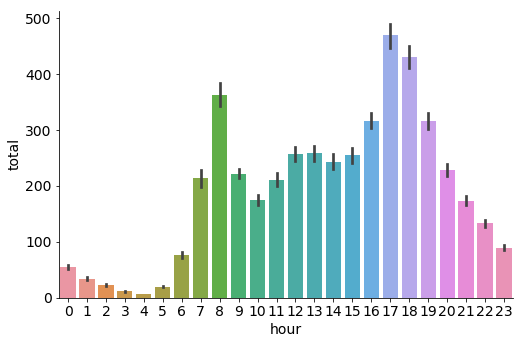

In [41]:
# with hour.
sns.factorplot(x="hour",y="total",data=bikes_data,kind='bar',size=5,aspect=1.5)

We  can see the the bike rentals are high during the morning hours between 7 to 9 am and similary between 5 to 6 pm in the evening. The main reason for this will be the office hours, where professionals try to beat the traffic with affordable transportation. In addition the weather condition are normal during morning & evening hours compare to day or night time. 

In [42]:
# hour as a categorical feature
hour_dummies = pd.get_dummies(bikes_data.hour, prefix='hour')
hour_dummies.drop(hour_dummies.columns[0], axis=1, inplace=True)
bikes_data = pd.concat([bikes_data, hour_dummies], axis=1)
#hour_dummies
bikes_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# daytime as a categorical feature
bikes_data['daytime'] = ((bikes_data.hour > 6) & (bikes_data.hour < 21)).astype(int)
bikes_data.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,daytime
datetime,,,,,,,,,,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.70,50,26.00,7,329,...,0,0,0,0,1,0,0,0,0,1
2012-12-19 20:00:00,4,0,1,1,14.76,17.43,57,15.00,10,231,...,0,0,0,0,0,1,0,0,0,1
2012-12-19 21:00:00,4,0,1,1,13.94,15.91,61,15.00,4,164,...,0,0,0,0,0,0,1,0,0,0
2012-12-19 22:00:00,4,0,1,1,13.94,17.43,61,6.00,12,117,...,0,0,0,0,0,0,0,1,0,0
2012-12-19 23:00:00,4,0,1,1,13.12,16.66,66,9.00,4,84,...,0,0,0,0,0,0,0,0,1,0


In [44]:
print (train_test_rmse(['hour']))
print (train_test_rmse(bikes_data.columns[bikes_data.columns.str.startswith('hour_')]))
print (train_test_rmse(['daytime']))

165.67174264111398
128.3112050281119
144.89116360237938


1. Looking at the rmse value, the lowest rmse value is for model#2 with hour_dummies. whereas the 'daytime' is the second best this could be due to our understanding of daytime from >6 & <21 is not same as the bikers thought prcess. Maybe bikers are considering different time zone classification. 

In [45]:
print('END')

END
